In [153]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import pandas as pd
import seaborn as sns

## CH3 Q13
## (a) Using the normal() method of your random number generator, create a vector, $x$, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [3]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)
print(x[:5])

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]


## (b) Using the normal() method, create a vector, $eps$, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [5]:
np.random.seed(1)
eps = np.random.normal(0, np.sqrt(0.25), 100)
print(eps[:5])

[ 0.81217268 -0.30587821 -0.26408588 -0.53648431  0.43270381]


## (c) Using $x$ and $eps$, generate a vector y according to the model $Y$ = −1+0.5$X$ + $\epsilon$. What is the length of the vector $y$? What are the values of $β_0$ and $β_1$ in this linear model?

In [7]:
y = -1 + 0.5*x + eps
print(y[:5])

[ 0.62434536 -1.61175641 -1.52817175 -2.07296862 -0.13459237]


$β_0$ = -1, 
$β_1$ = 0.5

## (d) Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

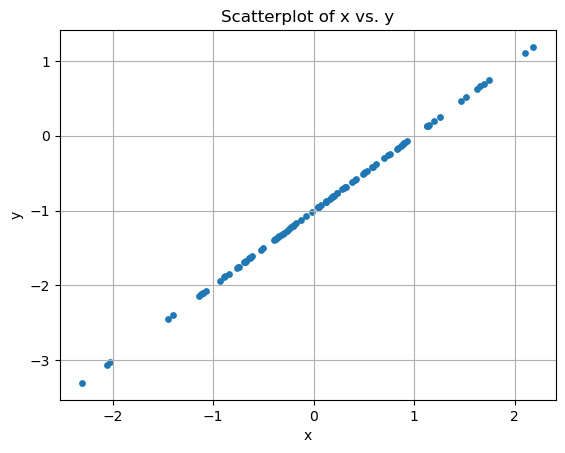

In [10]:
plt.scatter(x, y, alpha=1, s=15)
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## (e) Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $β_0$ and $β_1$?

In [12]:
X = sm.add_constant(x)  # Add a constant (intercept)
model = sm.OLS(y, X).fit()

# Print the summary
print("Linear Model Summary:")
print(model.summary())

Linear Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.771e+33
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:37:03   Log-Likelihood:                 3536.0
No. Observations:                 100   AIC:                            -7068.
Df Residuals:                      98   BIC:                            -7063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000   1.08e-

$\hat{\beta}_0$ = -1,
$\hat{\beta}_1$ = 1

## (f) Display the least squares line on the scatterplot obtained in (d).Draw the population regression line on the plot, in a diferentcolor. Use the legend() method of the axes to create an appropriate legend.

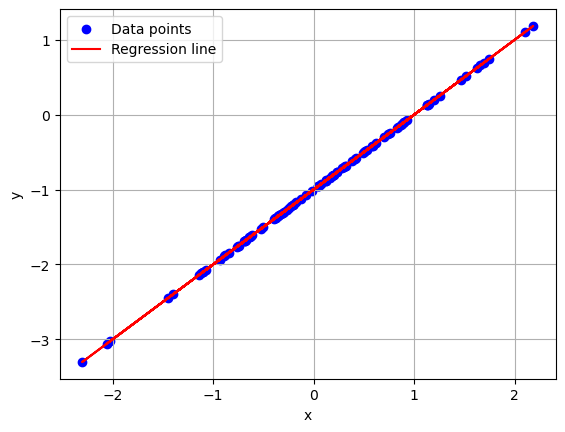

In [15]:
beta_0_hat = model.params[0]  
beta_1_hat = model.params[1]  
regression_line = beta_0_hat + beta_1_hat * x 
# Plot the original data points
plt.scatter(x, y, color='blue', label='Data points')
# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression line')
# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## (g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer

In [17]:
x_poly=np.column_stack((x, x**2))
x_poly = sm.add_constant(x_poly)
poly_model = sm.OLS(y,x_poly).fit()
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.802e+32
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:37:04   Log-Likelihood:                 3427.1
No. Observations:                 100   AIC:                            -6848.
Df Residuals:                      97   BIC:                            -6840.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000   3.93e-17  -2.54e+16      0.000      -1.000      -1.000
x1             1.0000   3.64e-17   2.75e+16      0.000       1.000       1.000
x2         -2.498e-16    2.9e-17     -8.621      0.000   -3.07e-16   -1.92e-16
==============================================================================
Omnibus:                       59.180   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.260
Skew:                           2.034   Prob(JB):                     2.72e-50
Kurtosis:                       9.183   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### No, the coefficient of the quadratic term is close to zero. Additionally, the R-squared value in the linear regression is 1, indicating that the linear model completely explains the dataset. Therefore, including the quadratic term does not improve the model further.

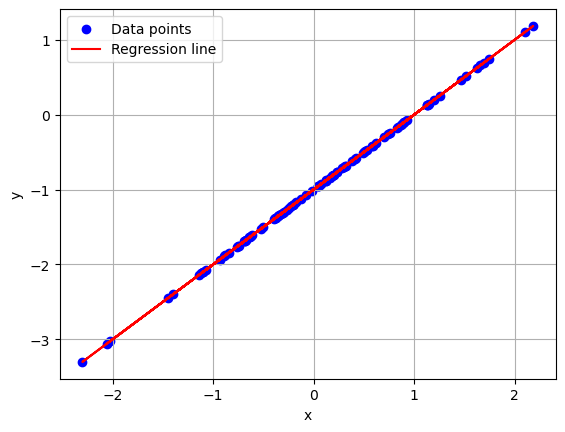

In [19]:
beta_0_hat = poly_model.params[0]  
beta_1_hat = poly_model.params[1]  
beta_2_hat = poly_model.params[2] 
regression_line_2 = beta_0_hat + beta_1_hat * x + beta_2_hat * (x**2)
# Plot the original data points
plt.scatter(x, y, color='blue', label='Data points')
# Plot the regression line
plt.plot(x, regression_line_2, color='red', label='Regression line')
# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

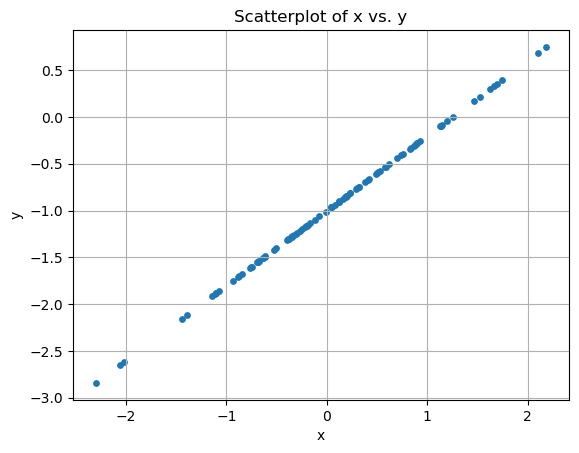

Linear Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.552e+33
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:37:04   Log-Likelihood:                 3526.0
No. Observations:                 100   AIC:                            -7048.
Df Residuals:                      98   BIC:                            -7043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000   1.19e-

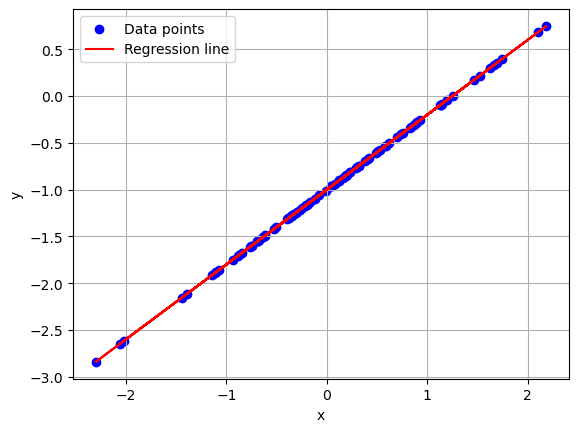

In [21]:
np.random.seed(1)
eps_2 = np.random.normal(0, np.sqrt(0.09), 100)
y_2 = -1 + 0.5*x + eps_2
plt.scatter(x, y_2, alpha=1, s=15)
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
X = sm.add_constant(x)  # Add a constant (intercept)
model_2 = sm.OLS(y_2, X).fit()

# Print the summary
print("Linear Model Summary:")
print(model_2.summary())
beta_0_hat_2 = model_2.params[0]  
beta_1_hat_2 = model_2.params[1]  
regression_line2 = beta_0_hat_2 + beta_1_hat_2 * x 
# Plot the original data points
plt.scatter(x, y_2, color='blue', label='Data points')
# Plot the regression line
plt.plot(x, regression_line2, color='red', label='Regression line')
# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

the variance of data points decreases.

## (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

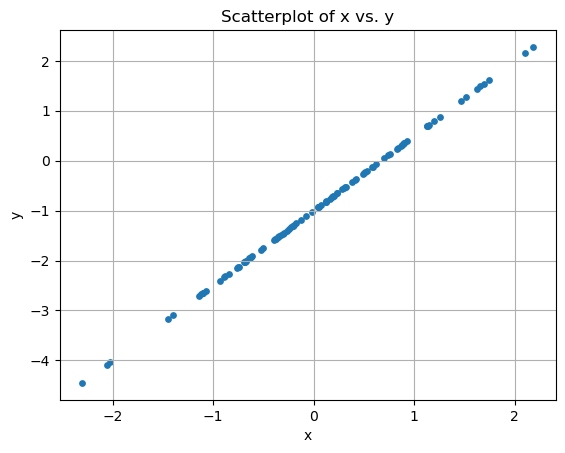

Linear Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.355e+33
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:37:04   Log-Likelihood:                 3505.9
No. Observations:                 100   AIC:                            -7008.
Df Residuals:                      98   BIC:                            -7003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000   1.46e-

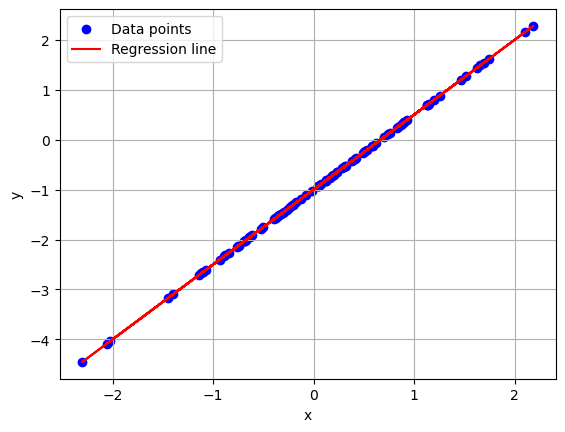

In [24]:
np.random.seed(1)
eps_3 = np.random.normal(0, np.sqrt(1), 100)
y_3 = -1 + 0.5*x + eps_3
plt.scatter(x, y_3, alpha=1, s=15)
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
X = sm.add_constant(x)  # Add a constant (intercept)
model_3 = sm.OLS(y_3, X).fit()

# Print the summary
print("Linear Model Summary:")
print(model_3.summary())
beta_0_hat_3 = model_3.params[0]  
beta_1_hat_3 = model_3.params[1]  
regression_line3 = beta_0_hat_3 + beta_1_hat_3 * x 
# Plot the original data points
plt.scatter(x, y_3, color='blue', label='Data points')
# Plot the regression line
plt.plot(x, regression_line3, color='red', label='Regression line')
# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

the variance of data points increases.

## (j) What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [27]:
#original data set
print('original data set','\n',"β0：",model.conf_int(alpha=0.05, cols=None)[0],'\n',"β1：",model.conf_int(alpha=0.05, cols=None)[1])
#the noisier data set
print('the noisier data set','\n',"β0：",model_2.conf_int(alpha=0.05, cols=None)[0],'\n',"β1：",model_2.conf_int(alpha=0.05, cols=None)[1])
#the less noisy data set
print('the less noisy data set','\n',"β0：",model_3.conf_int(alpha=0.05, cols=None)[0],'\n',"β1：",model_3.conf_int(alpha=0.05, cols=None)[1])


original data set 
 β0： [-1. -1.] 
 β1： [1. 1.]
the noisier data set 
 β0： [-1. -1.] 
 β1： [0.8 0.8]
the less noisy data set 
 β0： [-1. -1.] 
 β1： [1.5 1.5]


## CH3 Q14

## (a) Perform the following commands in Python:

In [87]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

y= $β_0$ + $β_1$ x1+ $β_2$ x2+$\epsilon$
- $β_0$=2 is the intercept.
- $β_1$=2 is the coefficient for 𝑥1
- $β_2$ =0.3 is the coefficient for 𝑥2
- $\epsilon$ represents the random noise term added to the model.

## (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables

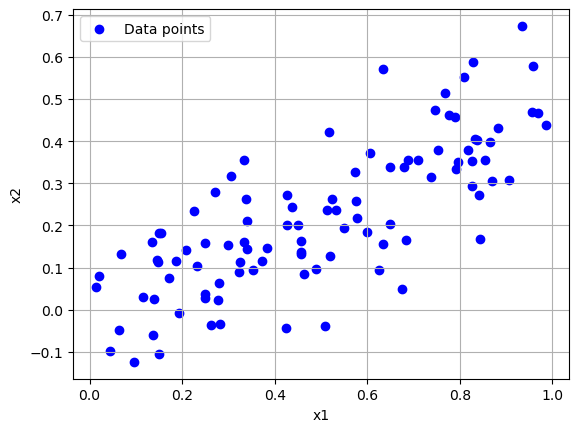

In [91]:
plt.scatter(x1, x2, color='blue', label='Data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

x1 and x2 have positive correlation.

## (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$ ? Can you reject the null hypothesis H0 : $\beta_1$=0? How about the null hypothesis H0 : $\beta_2$ = 0?

In [121]:
data= pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

In [123]:
model_a = smf.ols('y ~ x1 + x2',data=data).fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        22:44:45   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{\beta}_0$ = 1.9579
$\hat{\beta}_1$ = 1.6154
$\hat{\beta}_2$ = 0.9428 ;
- The hypothesis H0 : $\beta_1$=0 will be reject, because p_value=0.003<0.05.
- The hypothesis H0 : $\beta_2$=0 will not to be reject, because p_value=0.259>0.05.



## (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : $β_1$ = 0?

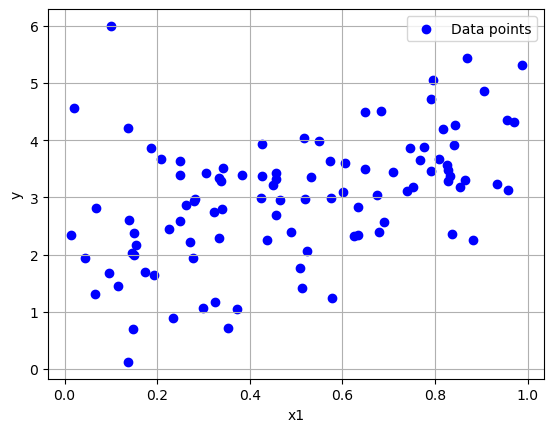

In [137]:
plt.scatter(x1, y, color='blue', label='Data points')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
model_b = smf.ols('y ~ x1 ',data=data).fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        22:45:14   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\beta_0$ = 1.9371, $\beta_1$ = 2.0771
- The hypothesis H0 : $\beta_1$ = 0 will be reject, because p_value=0.000<0.05.

## (e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : $\beta_1$ = 0?

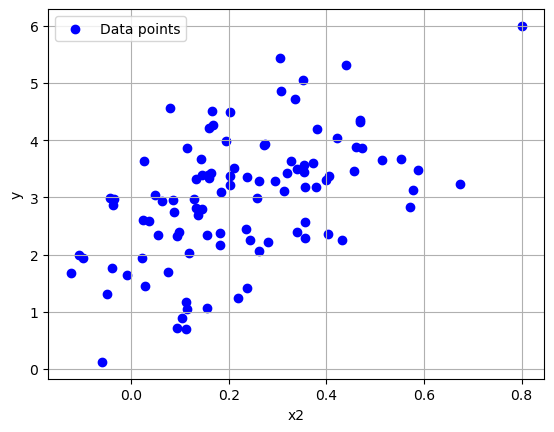

In [139]:
plt.scatter(x2, y, color='blue', label='Data points')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
model_c = smf.ols('y ~ x2',data=data).fit()
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        22:45:36   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\beta_0$ = 2.3239, $\beta_1$ = 2.9103
- The hypothesis H0 : $\beta_1$ = 0 will be reject, because p_value=0.000<0.05.

## (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

Yes, there does appear to be a contradiction between the results in (c) and (e). It can be explained by multicollinearity, that is x1 and x2 have positive correlation.

## (g) Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [133]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
data2= pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

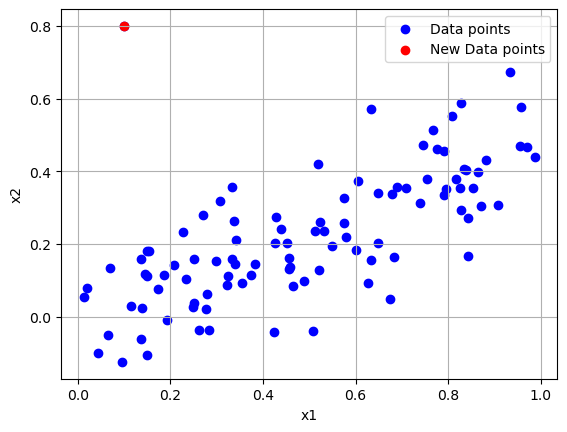

In [145]:
plt.scatter(x1, x2, color='blue', label='Data points')
plt.scatter(0.1, 0.8, color='red', label='New Data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
model_d = smf.ols('y ~ x1 + x2',data=data2).fit()
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        22:53:06   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\beta_0$ = 2.0618	, $\beta_1$ = 0.8575 , $\beta_2$ = 2.2663	
- The hypothesis H0 : $\beta_1$ = 0 will not to be reject, because p_value=0.069>0.05.
- The hypothesis H0 : $\beta_2$ = 0 will be reject, because p_value=0.002<0.05.

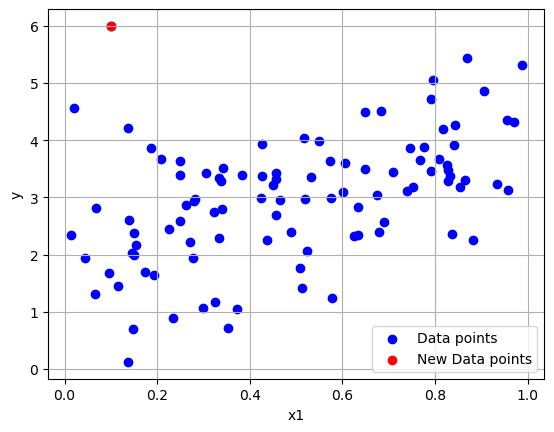

In [147]:
plt.scatter(x1, y, color='blue', label='Data points')
plt.scatter(0.1, 6, color='red', label='New Data points')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
model_e = smf.ols('y ~ x1 ',data=data2).fit()
model_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           9.23e-07
Time:                        23:08:23   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\beta_0$ = 2.0739	, $\beta_1$ = 1.8760 	
- The hypothesis H0 : $\beta_1$ = 0 will be reject, because p_value=0.000<0.05.

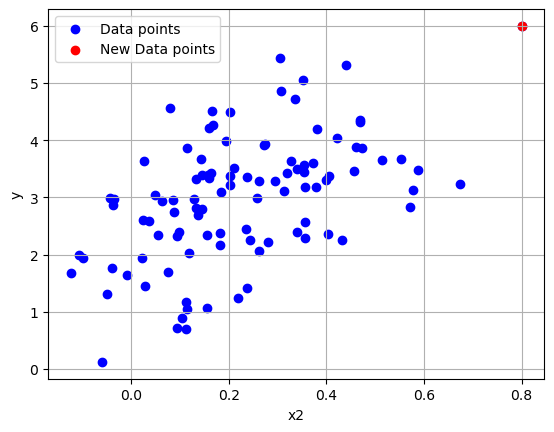

In [149]:
plt.scatter(x2, y, color='blue', label='Data points')
plt.scatter(0.8, 6, color='red', label='New Data points')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
model_f = smf.ols('y ~ x2',data=data2).fit()
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.13e-08
Time:                        23:11:04   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\beta_0$ = 2.2840, $\beta_1$ = 3.1458
- The hypothesis H0 : $\beta_1$ = 0 will be reject, because p_value=0.000<0.05.

## CH03 Q15

## (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [50]:
boston=pd.read_csv('Boston.csv',index_col=0)
display(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [173]:
predictors=boston.columns[1:]


C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


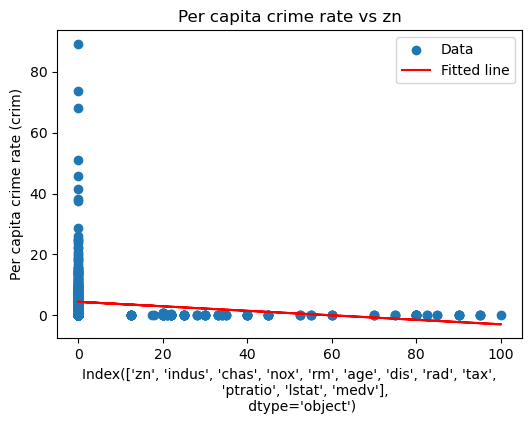

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


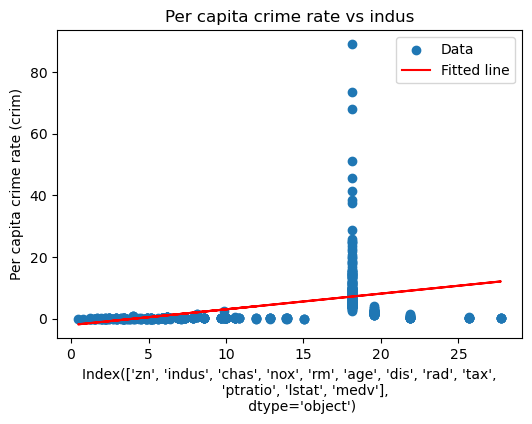

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


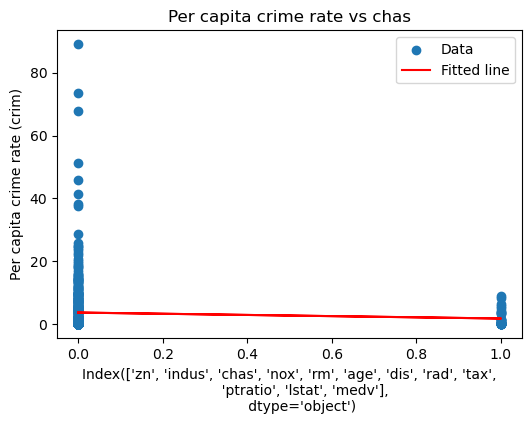

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


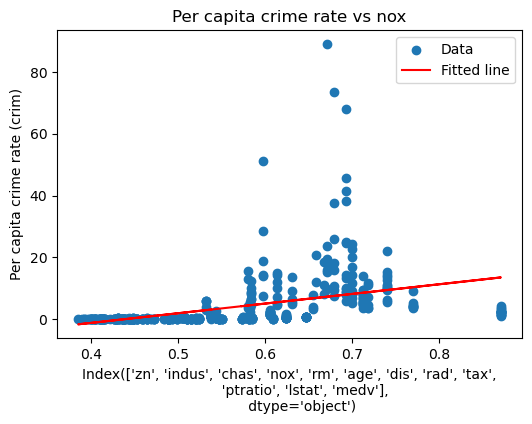

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


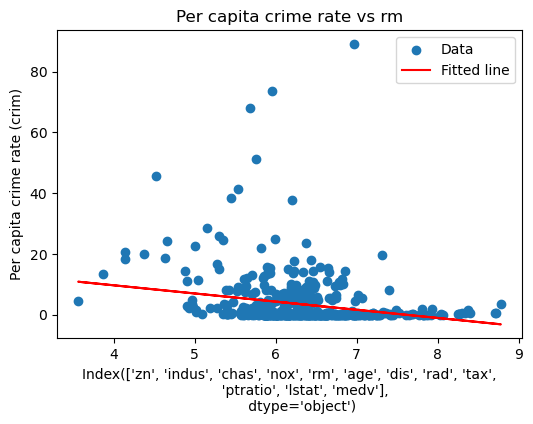

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


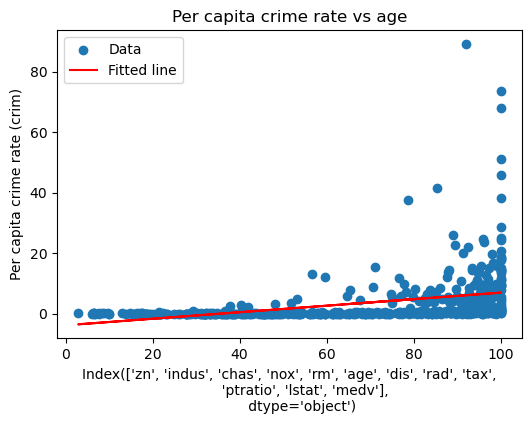

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


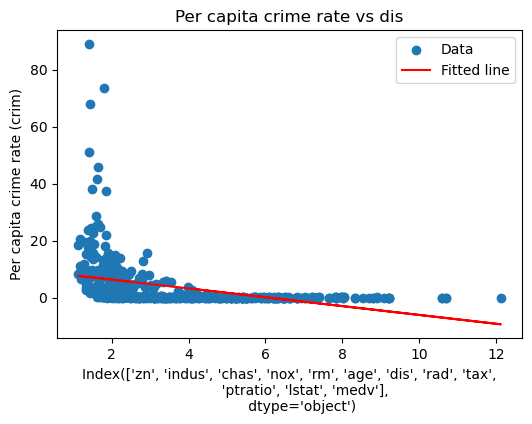

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


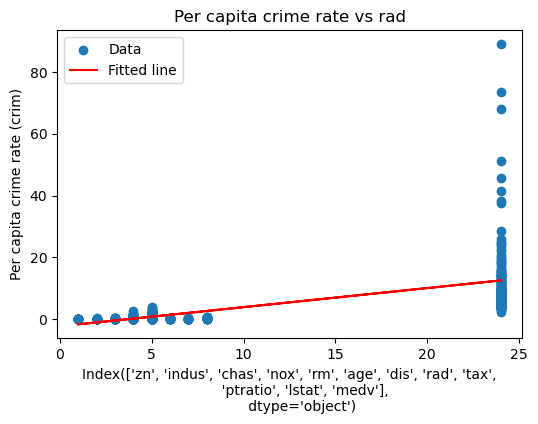

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


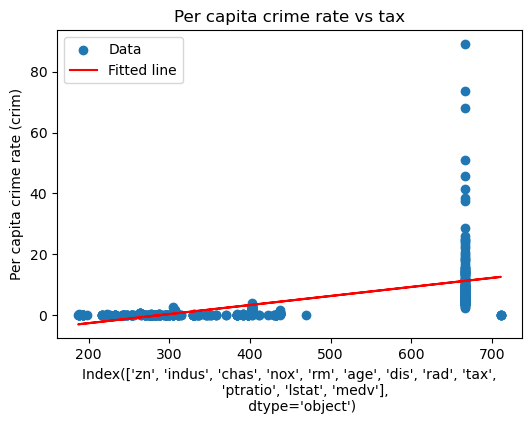

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


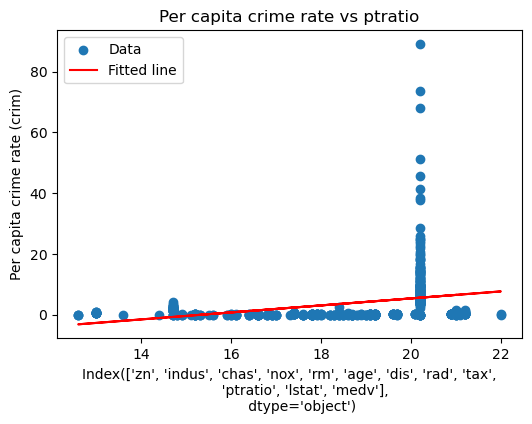

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


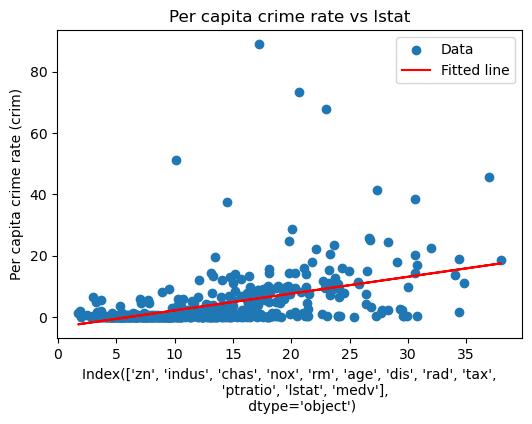

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1275751996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_p_value = round(result[i].pvalues[1], 4)


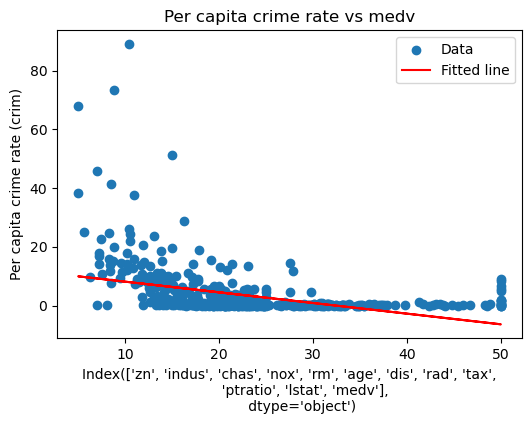

In [205]:
result = {}
summ = {} 
p_values = {} 
for i in predictors:
    X = sm.add_constant(boston[i])  
    y = boston['crim']  
    result[i] = sm.OLS(y, X).fit()  
    summ[i] = result[i].summary()
    intercept_p_value = round(result[i].pvalues[0], 4)
    slope_p_value = round(result[i].pvalues[1], 4)
    p_values[i] = {'Intercept p-value': intercept_p_value, 'Slope p-value': slope_p_value}
    plt.figure(figsize=(6, 4))
    plt.scatter(boston[i], boston['crim'], label='Data')
    plt.plot(boston[i], result[i].fittedvalues, color='red', label='Fitted line')
    plt.xlabel(predictors)
    plt.ylabel('Per capita crime rate (crim)')
    plt.title(f'Per capita crime rate vs {i}')
    plt.legend()
    plt.show()

In [203]:
for i in p_values:
    print(f"{i}: Intercept p-value = {p_values[i]['Intercept p-value']}, Slope p-value = {p_values[i]['Slope p-value']}")

zn: Intercept p-value = 0.0, Slope p-value = 0.0
indus: Intercept p-value = 0.0021, Slope p-value = 0.0
chas: Intercept p-value = 0.0, Slope p-value = 0.2094
nox: Intercept p-value = 0.0, Slope p-value = 0.0
rm: Intercept p-value = 0.0, Slope p-value = 0.0
age: Intercept p-value = 0.0001, Slope p-value = 0.0
dis: Intercept p-value = 0.0, Slope p-value = 0.0
rad: Intercept p-value = 0.0, Slope p-value = 0.0
tax: Intercept p-value = 0.0, Slope p-value = 0.0
ptratio: Intercept p-value = 0.0, Slope p-value = 0.0
lstat: Intercept p-value = 0.0, Slope p-value = 0.0
medv: Intercept p-value = 0.0, Slope p-value = 0.0


Most of predictors are statistically significant. Only 'chas' is not  statistically significant.

## (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : $\beta_j$ = 0?

In [208]:
bos = smf.ols('crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat + medv',data=boston).fit()
print(bos.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.03e-56
Time:                        00:03:41   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.0

we can reject the null hypothesis H0 : $\beta_j$ = 0 for these four predictors, zn, dis, rad,and medv.

## (c) How do your results from (a) compare to your results from (b)?Create a plot displaying the univariate regression coefcients from (a) on the x-axis, and the multiple regression coefcients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefcient estimate in the multiple linear regression model is shown on the y-axis.


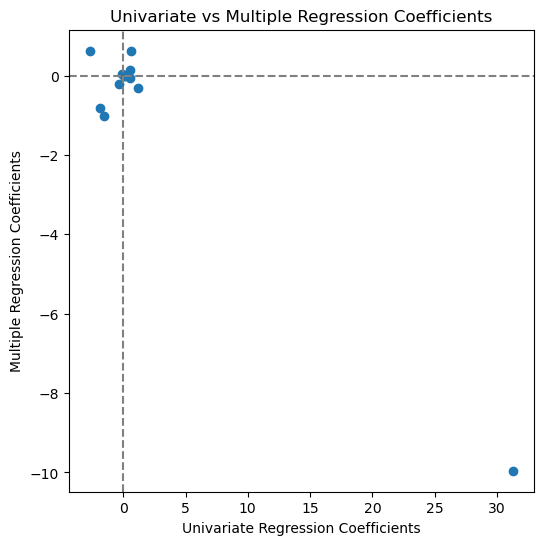

In [211]:
coef_a = np.array([result[i].params.iloc[1] for i in predictors])
coef_b = bos.params.iloc[1:]


plt.figure(figsize=(6, 6))
plt.scatter(coef_a, coef_b)
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Univariate vs Multiple Regression Coefficients')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

## (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
$Y$ = $\beta_0$ + $\beta_1$ $X$ + $\beta_2$ $X^2$ + $\beta_3$ $X^3$ + $\epsilon$.


C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

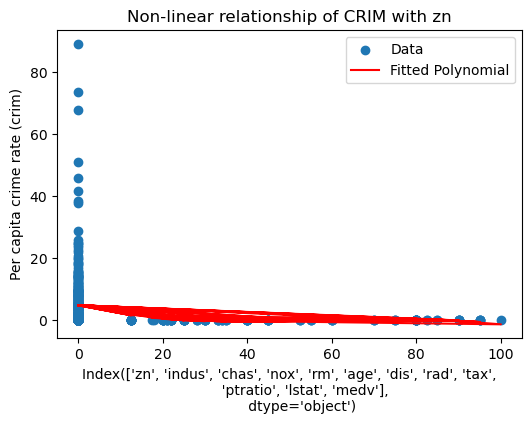

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

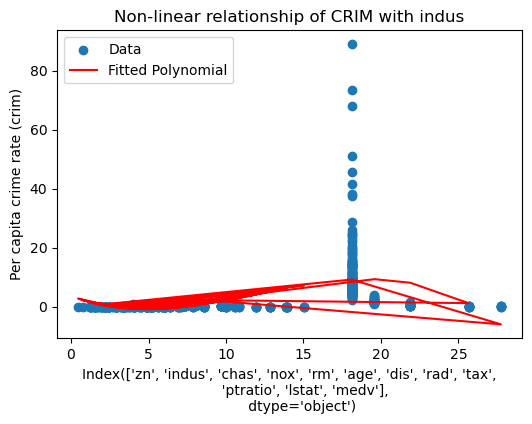

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

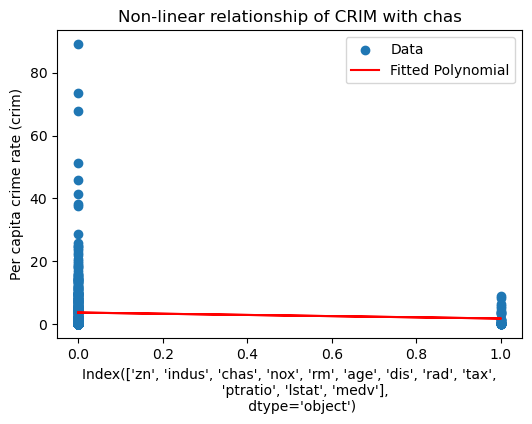

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

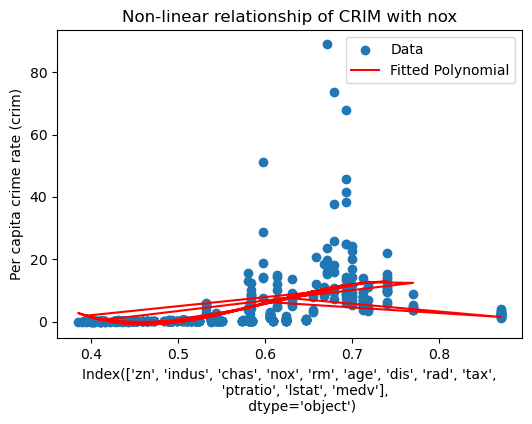

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

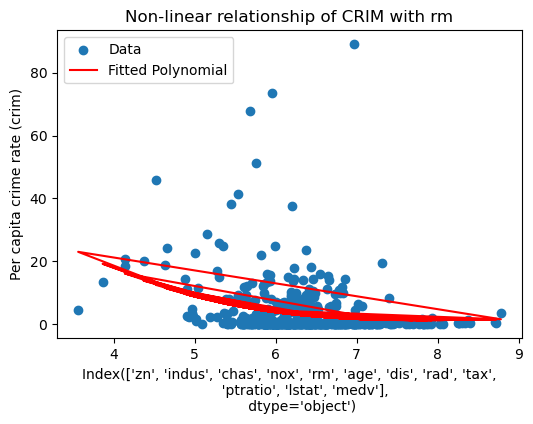

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

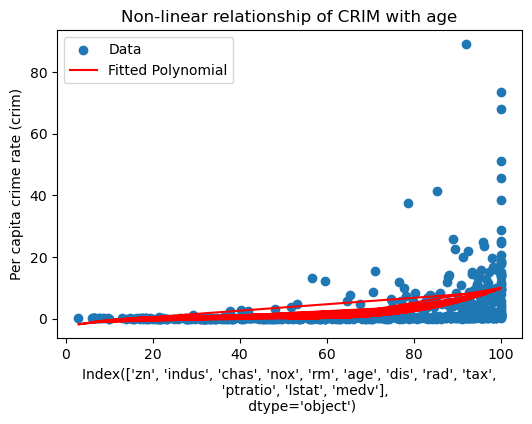

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

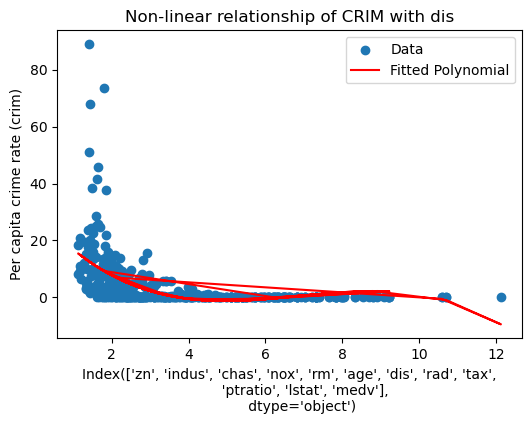

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

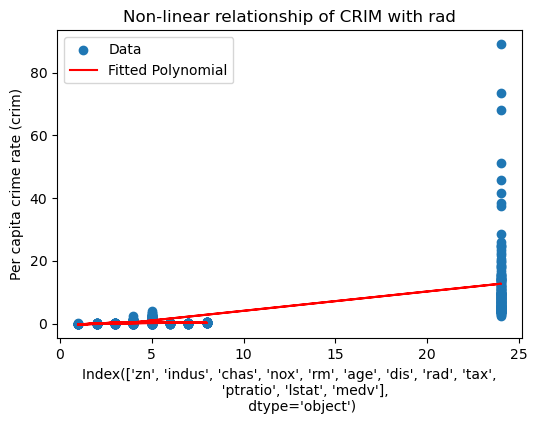

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

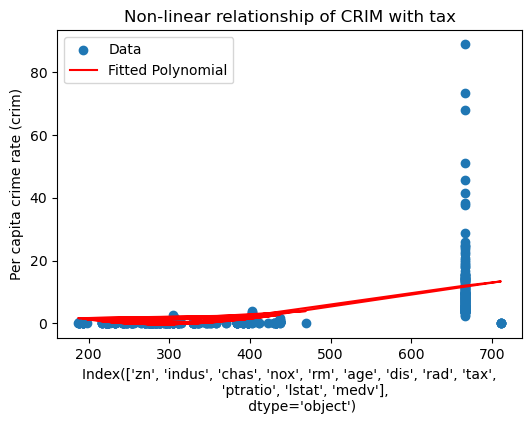

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

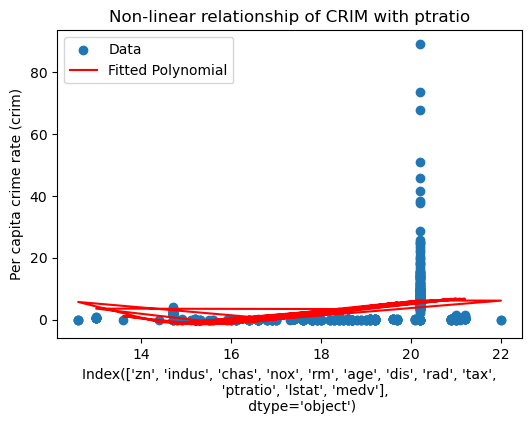

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

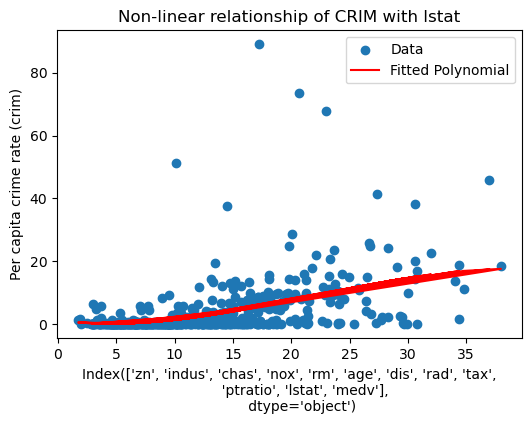

C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_p_value = round(result[i].pvalues[0], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_p_value = round(model_poly[i].pvalues[1], 4)
C:\Users\USER\AppData\Local\Temp\ipykernel_14400\1847170235.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

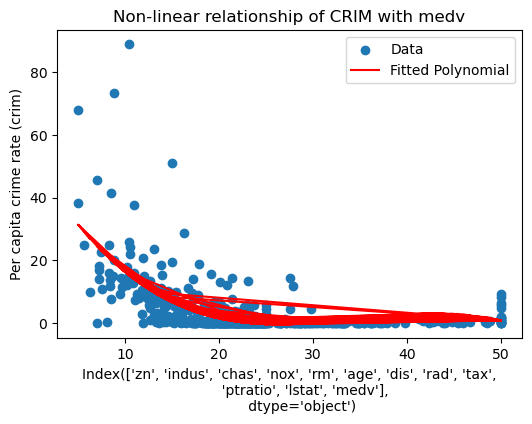

In [229]:
model_poly={}
poly_p_values={}
poly_line={}
for i in predictors:
    X_poly = pd.DataFrame({
        'X': boston[i],
        'X^2': boston[i] ** 2,
        'X^3': boston[i] ** 3
    })
    X_poly = sm.add_constant(X_poly)  
    model_poly[i] = sm.OLS(boston['crim'], X_poly).fit()
    intercept_p_value = round(result[i].pvalues[0], 4)
    beta1_p_value = round(model_poly[i].pvalues[1], 4)
    beta2_p_value = round(model_poly[i].pvalues[2], 4)
    beta3_p_value = round(model_poly[i].pvalues[3], 4)
    poly_p_values[i] = {'Intercept p-value': intercept_p_value, 'beta 1 p-value': beta1_p_value, 'beta 2 p-value': beta2_p_value, 'beta 3 p-value': beta3_p_value}
    poly_line[i] = model_poly[i].params[0] + model_poly[i].params[1]  * boston[i] + model_poly[i].params[2]  * boston[i]**2 + model_poly[i].params[3]  * boston[i]**3
    
    plt.figure(figsize=(6, 4))
    plt.scatter(boston[i], boston['crim'], label='Data')
    plt.plot(boston[i], poly_line[i], color='red', label='Fitted Polynomial')
    plt.xlabel(predictors)
    plt.ylabel('Per capita crime rate (crim)')
    plt.title(f'Non-linear relationship of CRIM with {i}')
    plt.legend()
    plt.show()


In [231]:
poly_p_values


{'zn': {'Intercept p-value': 0.0,
  'beta 1 p-value': 0.0026,
  'beta 2 p-value': 0.0938,
  'beta 3 p-value': 0.2295},
 'indus': {'Intercept p-value': 0.0021,
  'beta 1 p-value': 0.0001,
  'beta 2 p-value': 0.0,
  'beta 3 p-value': 0.0},
 'chas': {'Intercept p-value': 0.0,
  'beta 1 p-value': 0.2094,
  'beta 2 p-value': 0.2094,
  'beta 3 p-value': 0.2094},
 'nox': {'Intercept p-value': 0.0,
  'beta 1 p-value': 0.0,
  'beta 2 p-value': 0.0,
  'beta 3 p-value': 0.0},
 'rm': {'Intercept p-value': 0.0,
  'beta 1 p-value': 0.2118,
  'beta 2 p-value': 0.3641,
  'beta 3 p-value': 0.5086},
 'age': {'Intercept p-value': 0.0001,
  'beta 1 p-value': 0.1427,
  'beta 2 p-value': 0.0474,
  'beta 3 p-value': 0.0067},
 'dis': {'Intercept p-value': 0.0,
  'beta 1 p-value': 0.0,
  'beta 2 p-value': 0.0,
  'beta 3 p-value': 0.0},
 'rad': {'Intercept p-value': 0.0,
  'beta 1 p-value': 0.6234,
  'beta 2 p-value': 0.613,
  'beta 3 p-value': 0.4823},
 'tax': {'Intercept p-value': 0.0,
  'beta 1 p-value': 0.1

there is evidence of non-linear association between the
six predictors(indus, nox, age, dis, ptratio, medv) and the response ,because the these six predictors' p-value of $\beta_2$ or $\beta_3$ less than 0.05,it will reject $H_0$:$\beta_2$=0 or $H_0$:$\beta_3$=0.